# Time series comparison (UNGL, PANGA)

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import gpstools as gps

In [3]:
plt.style.use('seaborn-white')
%matplotlib notebook
%qtconsole

# Load time series

TPW2 already dowloaded... skipping
TPW2 already dowloaded... skipping
TPW2 already dowloaded... skipping


<IPython.core.display.Javascript object>


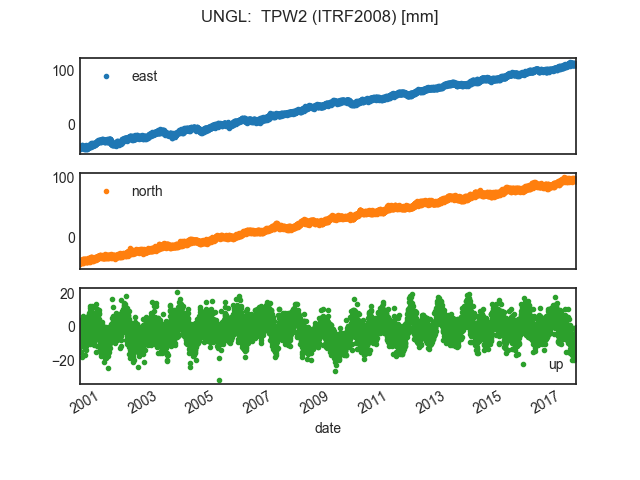

In [8]:
# We'll use station TPW2
station = 'TPW2'
ref1 = 'ITRF2008'
# Reference frame is ITRF2008
# Download data
gps.panga.download_data(station,overwrite=False)
# Load the timeseries as pandas dataframe
df1 = gps.panga.load_panga(station)
title1 = 'UNGL:  {} ({}) [mm]'.format(station, ref1)
axes = df1.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title1)

Overwriting TPW2


<IPython.core.display.Javascript object>


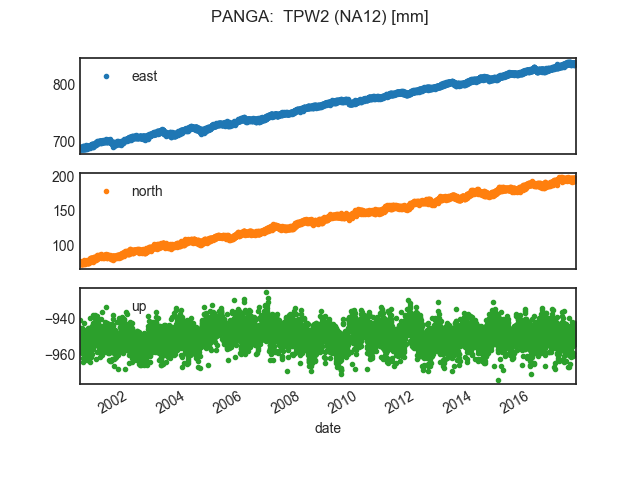

In [9]:
# Load UNGL
ref2= 'NA12'
# Download data
tenv3 = gps.ungl.download_data(station, ref2, overwrite=True)
df2 = gps.ungl.load_tenv3(tenv3)
title2 = 'PANGA:  {} ({}) [mm]'.format(station, ref2)
axes = df2.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=title2)

<IPython.core.display.Javascript object>


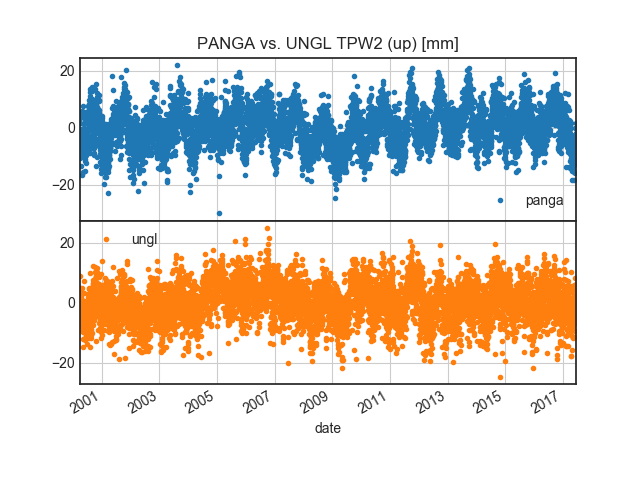

              panga         ungl
count  6.231000e+03  6212.000000
mean  -1.094722e-16    -0.005060
std    6.676763e+00     6.279493
min   -2.993778e+01   -24.670085
25%   -4.453398e+00    -4.212335
50%   -5.360817e-02     0.153915
75%    4.591432e+00     4.265165
max    2.196213e+01    24.766915


In [33]:
# Subtract mean from component to compare on same plot
#comp = 'east'
#comp = 'north'
comp = 'up'

df = pd.DataFrame(dict(panga=df1[comp]-df1[comp].mean())) 
df['ungl'] = df2[comp]-df2[comp].mean()

axes = df.plot(subplots=True,style='.')
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    
axes[0].set_title('PANGA vs. UNGL {} ({}) [mm]'.format(station,comp))
print(df.describe())

In [ ]:
fig,axes = plt.subplots(2,1, sharex=True, sharey=True, figsize=(11,6))
for i,site in enumerate(sites):
    ax = axes[i]
    tmp = gps.panga.load_panga(site)
    #tmp = tmp['2010/01/01':'2017/06/01']#specific time range
    tmp = gps.analysis.do_detrend(tmp, comp, start='2010/08/01', end='2016/01/01')
    ax.scatter(tmp.index, tmp['detrend1_'+comp],marker='.',label=site)
    ax.legend(loc='upper left')
    ax.grid(axis='x')

axes[0].set_title('PANGA ITRF2008 Comp={} [mm] (Detrended)'.format(comp))
fig.subplots_adjust(hspace=0, wspace=0)
fig.autofmt_xdate()
